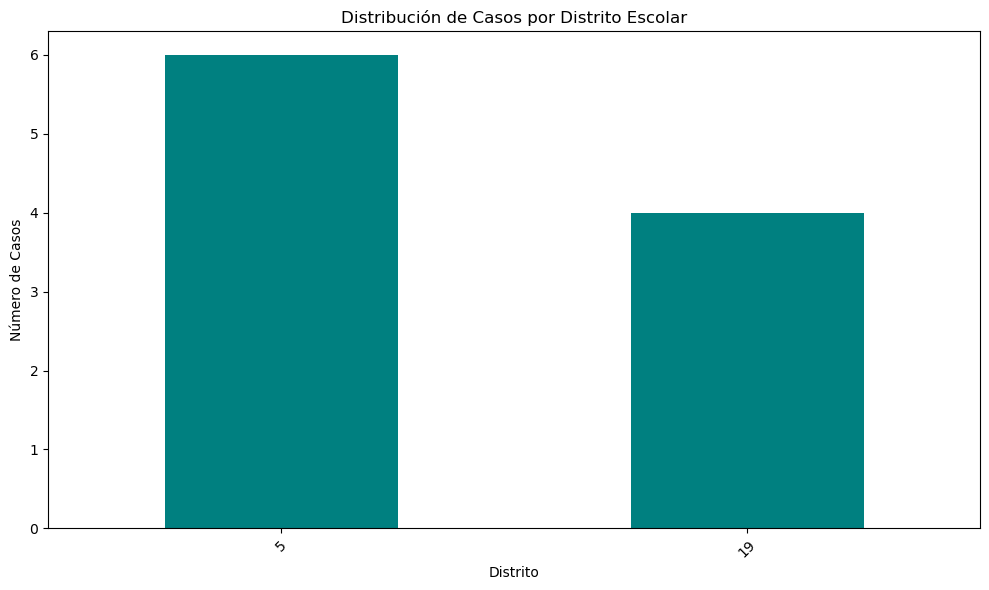

<Figure size 1200x600 with 0 Axes>

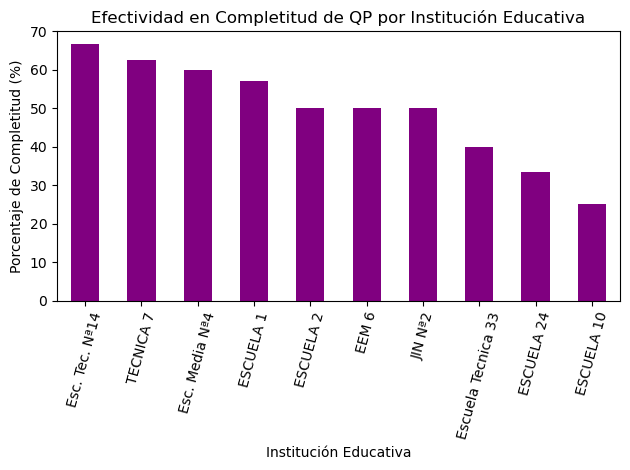

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


df_casos_detalle = pd.read_csv('casos_tbc_detallados.csv')

# Análisis adicional si se cargaron los datos
if df_casos_detalle is not None:
    # Gráfico de distribución por distrito
    plt.figure(figsize=(10, 6))
    df_casos_detalle['Distrito'].value_counts().plot(kind='bar', color='teal')
    plt.title('Distribución de Casos por Distrito Escolar')
    plt.ylabel('Número de Casos')
    plt.xlabel('Distrito')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Gráfico de efectividad de QP por institución
    df_casos_detalle['QP_Efectividad'] = (df_casos_detalle['QP_Completada'] / df_casos_detalle['QP_Indicada']) * 100
    plt.figure(figsize=(12, 6))
    df_casos_detalle.sort_values('QP_Efectividad', ascending=False)[['Institucion_Educativa', 'QP_Efectividad']].plot(
        kind='bar', x='Institucion_Educativa', color='purple', legend=False)
    plt.title('Efectividad en Completitud de QP por Institución Educativa')
    plt.ylabel('Porcentaje de Completitud (%)')
    plt.xlabel('Institución Educativa')
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.show()

Datos cargados correctamente:
    Año  Evaluados  Seguimiento_3meses  PPD_Positivo  QP_Completada
0  2023        193                  48            24             15
1  2024        225                  62            35             20


KeyError: 'Casos_Indice'

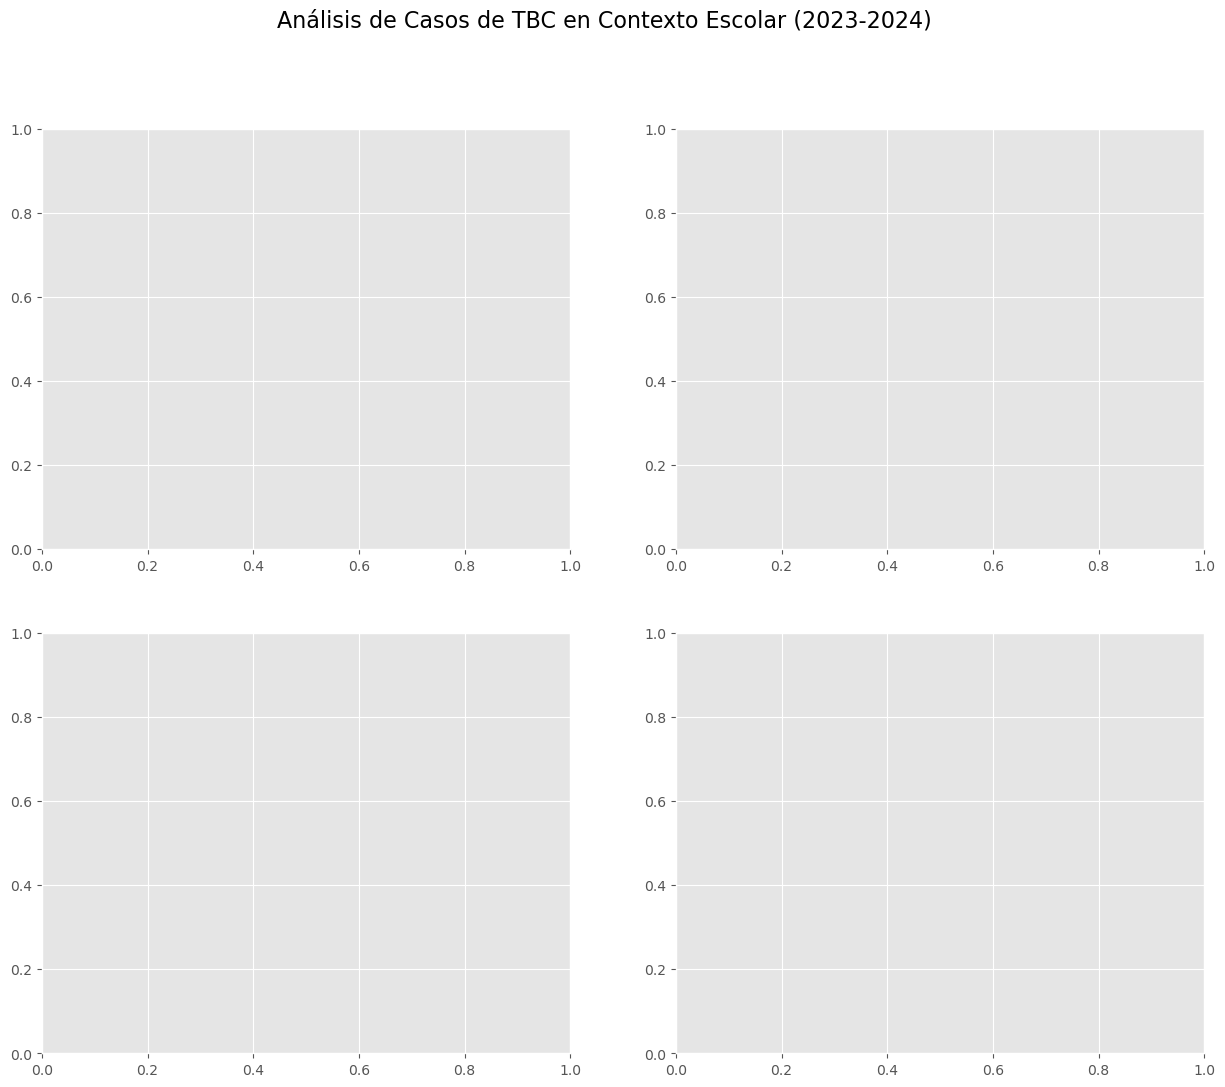

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.getipython import get_ipython

# Cargar datos desde archivo CSV
try:
    df = pd.read_csv('datos_tbc._3er_mes.csv')
    print("Datos cargados correctamente:")
    print(df.head())
except FileNotFoundError:
    raise KeyboardInterrupt("No se encontró el archivo de datos.")
     

# Configuración de estilo
plt.style.use('ggplot')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis de Casos de TBC en Contexto Escolar (2023-2024)', fontsize=16)

# Gráfico 1: Casos índice vs contactos
axes[0, 0].bar(df['Año'], df['Evaluados'], color='skyblue', label='Evaluados')
axes[0, 0].bar(df['Año'], df['Contactos_Evaluados'], bottom=df['Evaluados'], color='orange', label='Contactos Evaluados')
axes[0, 0].set_title('Casos Índice y Contactos Evaluados')
axes[0, 0].set_ylabel('Cantidad')
axes[0, 0].legend()

# Gráfico 2: Seguimiento al 3er mes
axes[0, 1].bar(df['Año'], df['Contactos_Evaluados'], color='lightgray', label='Evaluados Inicialmente')
axes[0, 1].bar(df['Año'], df['Evaluacion_3er_Mes'], color='green', label='Evaluados al 3er Mes')
axes[0, 1].set_title('Seguimiento al 3er Mes')
axes[0, 1].set_ylabel('Cantidad')
axes[0, 1].legend()

# Gráfico 3: Quimioprofilaxis
axes[1, 0].bar(df['Año'], df['QP_Indicada'], color='navy', label='QP Indicada')
axes[1, 0].bar(df['Año'], df['QP_Completada'], color='lightblue', label='QP Completada')
axes[1, 0].set_title('Quimioprofilaxis Indicada vs Completada')
axes[1, 0].set_ylabel('Cantidad')
axes[1, 0].legend()

# Gráfico 4: Tasas clave
rates_2023 = [
    df.loc[0, 'Evaluacion_3er_Mes']/df.loc[0, 'Contactos_Evaluados']*100,
    df.loc[0, 'QP_Completada']/df.loc[0, 'QP_Indicada']*100 if df.loc[0, 'QP_Indicada'] > 0 else 0
]
rates_2024 = [
    df.loc[1, 'Evaluacion_3er_Mes']/df.loc[1, 'Contactos_Evaluados']*100,
    df.loc[1, 'QP_Completada']/df.loc[1, 'QP_Indicada']*100 if df.loc[1, 'QP_Indicada'] > 0 else 0
]

x = range(len(rates_2023))
width = 0.35
axes[1, 1].bar(x, rates_2023, width, label='2023', color='blue')
axes[1, 1].bar([i + width for i in x], rates_2024, width, label='2024', color='red')
axes[1, 1].set_title('Tasas Clave (%)')
axes[1, 1].set_xticks([i + width/2 for i in x])
axes[1, 1].set_xticklabels(['Seguimiento 3er mes', 'QP Completada/Indicada'])
axes[1, 1].set_ylabel('Porcentaje')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

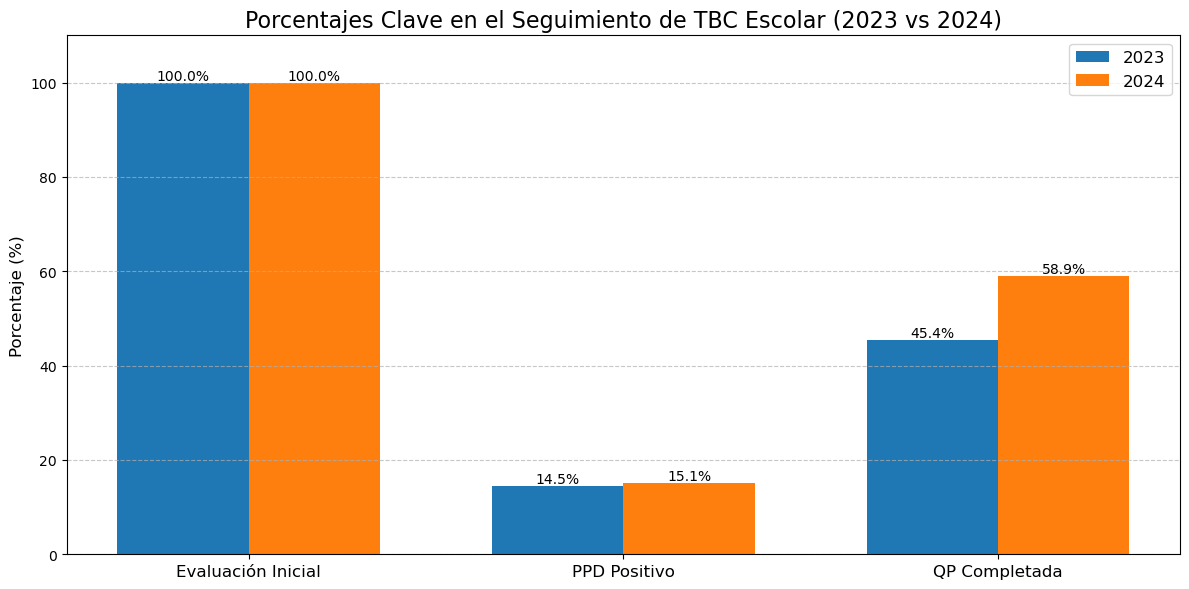

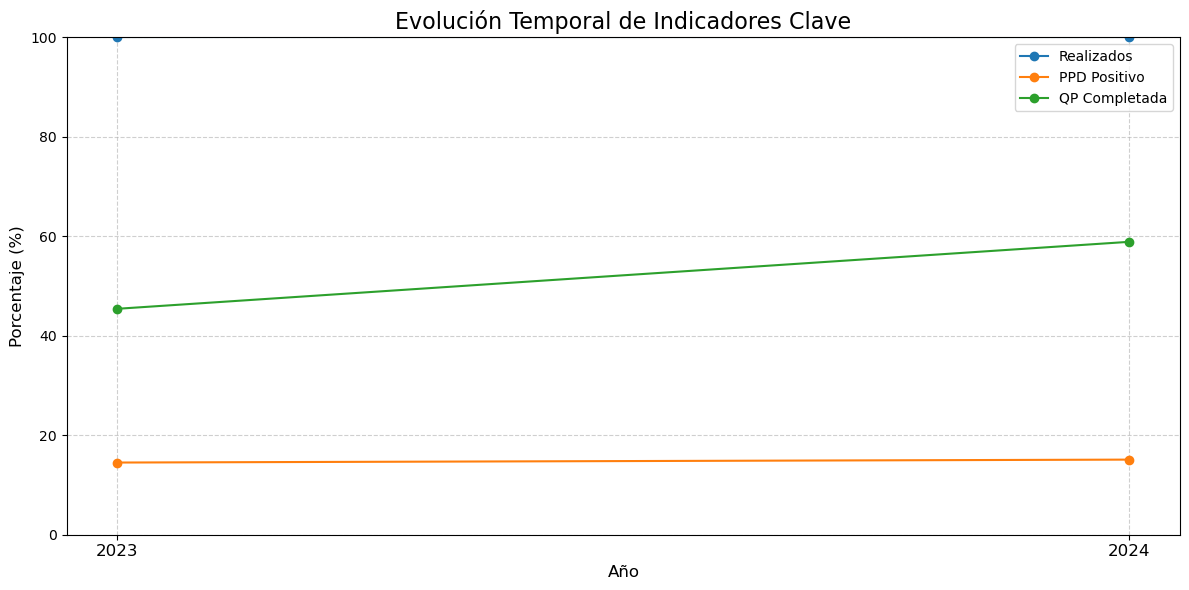

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('casos_tbc_detallados.csv')

# 1. Calcular porcentajes
df['%_Ausentes'] = ((df['Contactos_Identificados'] - df['Contactos_Evaluados']) / df['Contactos_Identificados']) * 100
df['%_Realizados'] = (df['Contactos_Evaluados'] / df['Contactos_Identificados']) * 100
df['%_PPD_Positivo'] = (df['PPD_Positivos'] / df['Contactos_Evaluados']) * 100
df['%_QP_Completada'] = (df['QP_Completada'] / df['QP_Indicada']) * 100 * (df['QP_Indicada'] > 0)  # Evitar división por cero

# 2. Gráfico de porcentajes clave
plt.figure(figsize=(12, 6))

# Configurar datos para el gráfico de barras agrupadas
categories = ['Evaluación Inicial', 'PPD Positivo', 'QP Completada']
porcentajes_2023 = [
    df[df['Año'] == 2023]['%_Realizados'].mean(),
    df[df['Año'] == 2023]['%_PPD_Positivo'].mean(),
    df[df['Año'] == 2023]['%_QP_Completada'].mean()
]
porcentajes_2024 = [
    df[df['Año'] == 2024]['%_Realizados'].mean(),
    df[df['Año'] == 2024]['%_PPD_Positivo'].mean(),
    df[df['Año'] == 2024]['%_QP_Completada'].mean()
]

x = range(len(categories))
width = 0.35

# Crear gráfico
bars_2023 = plt.bar(x, porcentajes_2023, width, label='2023', color='#1f77b4')
bars_2024 = plt.bar([i + width for i in x], porcentajes_2024, width, label='2024', color='#ff7f0e')

# Personalizar gráfico
plt.title('Porcentajes Clave en el Seguimiento de TBC Escolar (2023 vs 2024)', fontsize=16)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks([i + width/2 for i in x], categories, fontsize=12)
plt.ylim(0, 110)
plt.legend(fontsize=12)

# Agregar etiquetas con los valores
for bars in [bars_2023, bars_2024]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 3. Tabla resumen de porcentajes
resumen = pd.DataFrame({
    'Indicador': ['Evaluación inicial realizada', 'PPD positivo', 'QP completada'],
    '2023 (%)': [f"{df[df['Año'] == 2023]['%_Realizados'].mean():.1f}",
                f"{df[df['Año'] == 2023]['%_PPD_Positivo'].mean():.1f}",
                f"{df[df['Año'] == 2023]['%_QP_Completada'].mean():.1f}"],
    '2024 (%)': [f"{df[df['Año'] == 2024]['%_Realizados'].mean():.1f}",
                f"{df[df['Año'] == 2024]['%_PPD_Positivo'].mean():.1f}",
                f"{df[df['Año'] == 2024]['%_QP_Completada'].mean():.1f}"],
    'Diferencia (p.p.)': [f"{(df[df['Año'] == 2024]['%_Realizados'].mean() - df[df['Año'] == 2023]['%_Realizados'].mean()):.1f}",
                         f"{(df[df['Año'] == 2024]['%_PPD_Positivo'].mean() - df[df['Año'] == 2023]['%_PPD_Positivo'].mean()):.1f}",
                         f"{(df[df['Año'] == 2024]['%_QP_Completada'].mean() - df[df['Año'] == 2023]['%_QP_Completada'].mean()):.1f}"]
})

# print("\nTabla Resumen de Porcentajes Clave:")
# print("="*60)
# print(resumen.to_string(index=False))
# print("\n" + "="*60)

plt.show()

# 4. Gráfico de evolución temporal (solo para años con datos completos)
if len(df['Año'].unique()) > 1:
    plt.figure(figsize=(12, 6))
    
    # Calcular promedios anuales
    anual = df.groupby('Año')[['%_Realizados', '%_PPD_Positivo', '%_QP_Completada']].mean()
    
    for col in anual.columns:
        plt.plot(anual.index, anual[col], marker='o', label=col.replace('%_', '').replace('_', ' '))
    
    plt.title('Evolución Temporal de Indicadores Clave', fontsize=16)
    plt.ylabel('Porcentaje (%)', fontsize=12)
    plt.xlabel('Año', fontsize=12)
    plt.xticks(anual.index, fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(0, 100)
    
    plt.tight_layout()
    plt.show()
    


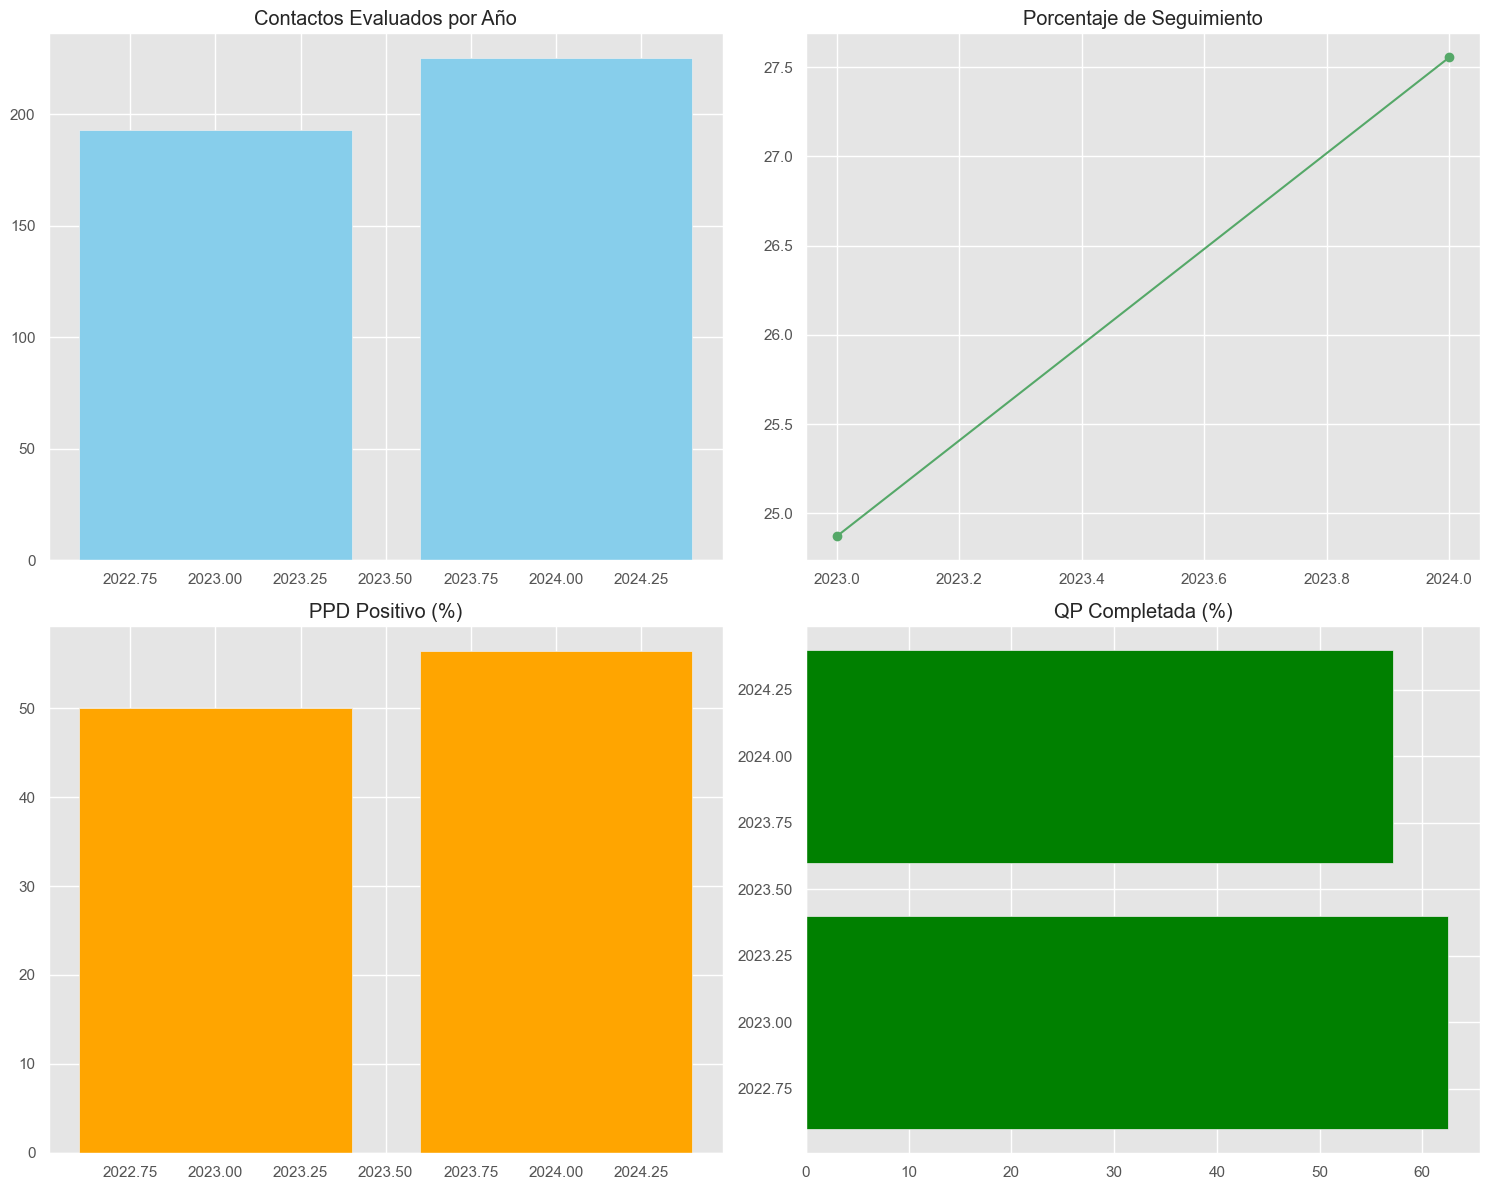

In [ ]:
import matplotlib.pyplot as plt  # Importación correcta
import pandas as pd

# 1. Configuración inicial
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# 2. Datos de ejemplo (reemplazar con tus datos reales)
data = {
    'Año': [2023, 2024],
    'Evaluados': [193, 225],
    'Seguimiento_3meses': [48, 62],
    'PPD_Positivo': [24, 35],
    'QP_Completada': [15, 20]
}
df = pd.DataFrame(data)

# 3. Cálculo de porcentajes
df['%_Seguimiento'] = (df['Seguimiento_3meses']/df['Evaluados'])*100
df['%_PPD_Positivo'] = (df['PPD_Positivo']/df['Seguimiento_3meses'])*100
df['%_QP_Completa'] = (df['QP_Completada']/df['PPD_Positivo'])*100

# 4. Visualización corregida
# Gráfico 1: Comparativa anual
axs[0,0].bar(df['Año'], df['Evaluados'], color='skyblue', label='Evaluados')
axs[0,0].set_title('Contactos Evaluados por Año')

# Gráfico 2: Porcentaje de seguimiento
axs[0,1].plot(df['Año'], df['%_Seguimiento'], 'go-', label='Seguimiento a 3 meses')
axs[0,1].set_title('Porcentaje de Seguimiento')

# Gráfico 3: PPD Positivo
axs[1,0].bar(df['Año'], df['%_PPD_Positivo'], color='orange')
axs[1,0].set_title('PPD Positivo (%)')

# Gráfico 4: QP Completada
axs[1,1].barh(df['Año'], df['%_QP_Completa'], color='green')
axs[1,1].set_title('QP Completada (%)')

plt.tight_layout()
plt.show()


✅ Datos cargados correctamente
    Año  Evaluados  Seguimiento_3meses  PPD_Positivo  QP_Completada
0  2023        193                  48            24             15
1  2024        225                  62            35             20
📊 Gráficos generados: analisis_tbc.png


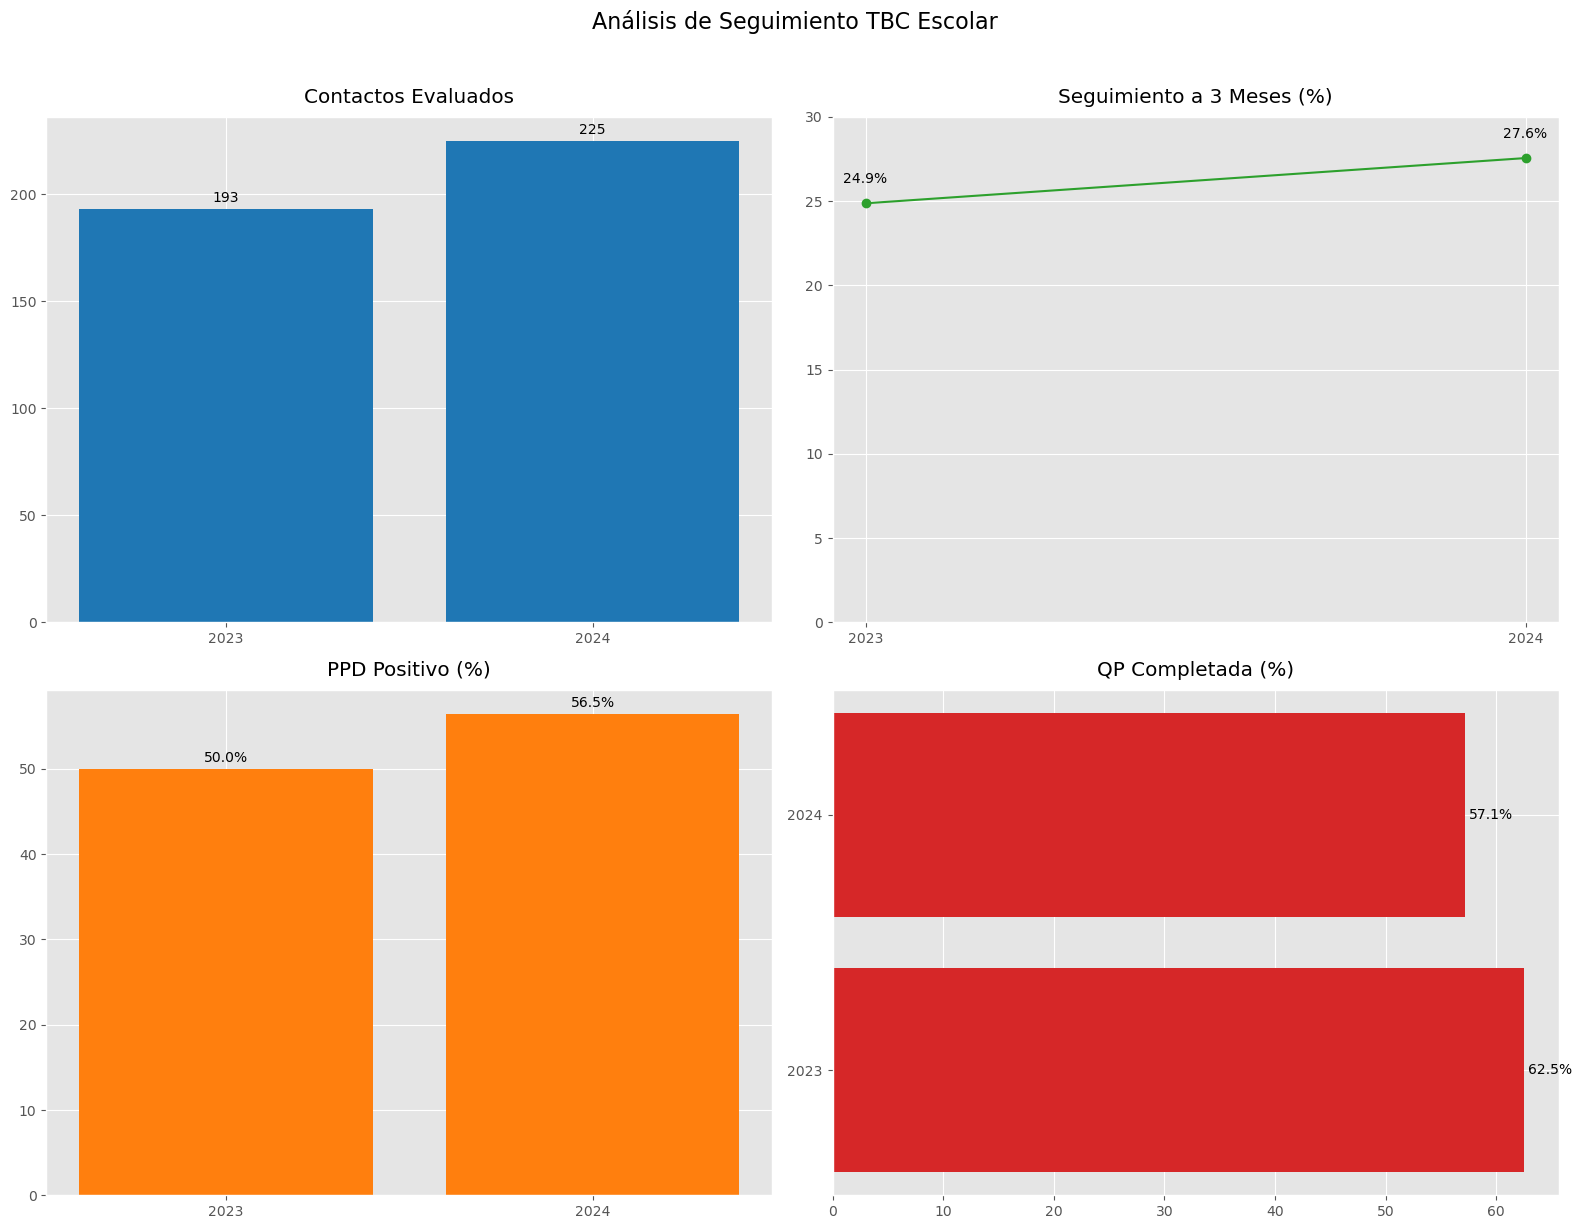

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar datos desde CSV
try:
    df = pd.read_csv('datos_tbc.csv')  # Cambiar por tu ruta real
    print("✅ Datos cargados correctamente")
    print(df.head())
    
except FileNotFoundError:
    print("⚠️ Archivo no encontrado. Usando datos de ejemplo...")
    data = {
        'Año': [2023, 2024],
        'Evaluados': [193, 225],
        'Seguimiento_3meses': [48, 62],
        'PPD_Positivo': [24, 35],
        'QP_Completada': [15, 20]
    }
    df = pd.DataFrame(data)
    df.to_csv('datos_tbc.csv', index=False)  # Guardar para uso futuro

# 2. Preprocesamiento seguro
try:
    # Convertir años a enteros y filtrar valores nulos
    df['Año'] = pd.to_numeric(df['Año'], errors='coerce').astype('Int64')
    df = df.dropna(subset=['Año'])
    
    # Calcular porcentajes con manejo de divisiones por cero
    df['%_Seguimiento'] = df.apply(
        lambda x: (x['Seguimiento_3meses']/x['Evaluados'])*100 if x['Evaluados'] > 0 else 0, 
        axis=1
    )
    df['%_PPD_Positivo'] = df.apply(
        lambda x: (x['PPD_Positivo']/x['Seguimiento_3meses'])*100 if x['Seguimiento_3meses'] > 0 else 0, 
        axis=1
    )
    df['%_QP_Completa'] = df.apply(
        lambda x: (x['QP_Completada']/x['PPD_Positivo'])*100 if x['PPD_Positivo'] > 0 else 0, 
        axis=1
    )
    
except KeyError as e:
    print(f"🚨 Error: Columna no encontrada - {e}")
    print("Columnas disponibles:", df.columns.tolist())
    exit()

# 3. Visualización con etiquetas
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Seguimiento TBC Escolar', fontsize=16, y=1.02)

# Gráfico 1: Contactos evaluados
bars1 = axs[0,0].bar(df['Año'].astype(str), df['Evaluados'], color='#1f77b4')
axs[0,0].set_title('Contactos Evaluados', pad=10)
axs[0,0].bar_label(bars1, fmt='%d', padding=3, fontsize=10)

# Gráfico 2: Porcentaje de seguimiento
lines = axs[0,1].plot(df['Año'].astype(str), df['%_Seguimiento'], 'o-', color='#2ca02c')
axs[0,1].set_title('Seguimiento a 3 Meses (%)', pad=10)
axs[0,1].set_ylim(0, 30)
for x, y in zip(range(len(df)), df['%_Seguimiento']):
    axs[0,1].text(x, y+1, f'{y:.1f}%', ha='center', va='bottom')

# Gráfico 3: PPD Positivo
bars2 = axs[1,0].bar(df['Año'].astype(str), df['%_PPD_Positivo'], color='#ff7f0e')
axs[1,0].set_title('PPD Positivo (%)', pad=10)
axs[1,0].bar_label(bars2, fmt='%.1f%%', padding=3, fontsize=10)

# Gráfico 4: QP Completada
bars3 = axs[1,1].barh(df['Año'].astype(str), df['%_QP_Completa'], color='#d62728')
axs[1,1].set_title('QP Completada (%)', pad=10)
axs[1,1].bar_label(bars3, fmt='%.1f%%', padding=3, fontsize=10)

plt.tight_layout()
plt.savefig('analisis_tbc.png', dpi=300, bbox_inches='tight')
print("📊 Gráficos generados: analisis_tbc.png")
plt.show()

In [8]:
df

,ID_Caso,Año,Fecha_Diagnostico,DNI,Apellido,Nombre,Edad,Institucion_Educativa,Distrito,Tipo_Gestion,...,Contactos_Identificados,Contactos_Evaluados,PPD_Positivos,QP_Indicada,QP_Completada,Caso_Secundario,%_Ausentes,%_Realizados,%_PPD_Positivo,%_QP_Completada
0,1,2023,11/10/2022,48715197,Choque Alfonzo,Alejandro Bruno,14,Escuela Tecnica 33,19,PÚBLICA,...,28,28,3,5,2,NO,0.0,100.0,10.714286,40.000000
1,2,2023,31/10/2022,52649910,QUISPE MAMANI,MATIAS,10,ESCUELA 2,19,PÚBLICA,...,22,22,4,6,3,NO,0.0,100.0,18.181818,50.000000
2,3,2023,08/11/2022,50662813,SANABRIA,AILEN,11,ESCUELA 10,5,PÚBLICA,...,26,26,2,4,1,NO,0.0,100.0,7.692308,25.000000
3,4,2023,24/10/2022,51071328,VASQUEZ,CRISTIAN,12,ESCUELA 1,19,PÚBLICA,...,29,29,5,7,4,SI,0.0,100.0,17.241379,57.142857
4,5,2023,07/03/2023,49317947,QUARANTA VILLANUEVA,GABRIEL,15,EEM 6,5,PÚBLICA,...,16,16,3,4,2,NO,0.0,100.0,18.750000,50.000000
5,6,2023,12/04/2023,46918661,CASTRO TICSE,MATIAS,17,TECNICA 7,5,PÚBLICA,...,25,25,6,8,5,SI,0.0,100.0,24.000000,62.500000
6,7,2023,13/04/2023,54626393,GONZALEZ ARCE,WENDY LUANA,8,ESCUELA 24,5,PÚBLICA,...,20,20,1,3,1,NO,0.0,100.0,5.000000,33.333333
7,8,2024,06/02/2024,58140009,Sosa Alvarez,Eliel,4,JIN Nª2,5,Publico,...,24,24,2,4,2,NO,0.0,100.0,8.333333,50.000000
8,9,2024,22/02/2024,50047708,Ortega Flores,Matias,14,Esc. Media Nª4,19,PUBLICO,...,22,22,3,5,3,NO,0.0,100.0,13.636364,60.000000
9,10,2024,03/05/24,48799077,TORREJON MANSILLA,Lucero Jazmin,15,Esc. Tec. Nª14,5,Publica,...,30,30,7,9,6,NO,0.0,100.0,23.333333,66.666667


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Configurar estilo de Seaborn
sns.set_theme(style="whitegrid")  # ✅ Estilo correcto
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Cargar los datos
input_file = 'casos_tbc_detallados.csv'
df = pd.read_csv(input_file)

# Convert date to datetime format and create month-year column
df['fecha'] = pd.to_datetime(df['fecha_detección'], format='%m/%Y')
df['mes_año'] = df['fecha'].dt.strftime('%m/%Y')

# 1. Temporal Evolution of Cases and Contacts (FIXED)
plt.figure(figsize=(14, 7))
# Group by month and sum only numeric columns
monthly_data = df.groupby(['mes_año', 'fecha']).sum(numeric_only=True)[['contactos', 'ppd+', 'qp_iniciadas']].reset_index()
monthly_data = monthly_data.sort_values('fecha')  # Sort chronologically

ax = plt.gca()
monthly_data.plot(x='mes_año', y=['contactos', 'ppd+', 'qp_iniciadas'], kind='bar', ax=ax)
plt.title('Evolución Temporal de Casos y Contactos (2023-2024)')
plt.xlabel('Mes/Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend(['Contactos', 'PPD+', 'Quimioprofilaxis'])
plt.tight_layout()
plt.show()


## 2. Distribución por Distrito (Top 5)
top_distritos = df.groupby('distrito')[['contactos', 'ppd+', 'qp_iniciadas', 'catastrados_3m']].sum().sort_values('ppd+', ascending=False).head(5)
plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(top_distritos))
plt.barh(x - width/2, top_distritos['contactos'], height=width, label='Contactos', color='gray')
plt.barh(x + width/2, top_distritos['ppd+'], height=width, label='PPD+', color='red')
plt.yticks(x, top_distritos.index)
plt.title('Top 5 Distritos con Mayor Carga de Casos')
plt.xlabel('Cantidad')
plt.legend()
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

## 3. Tasa de Quimioprofilaxis por Nivel Educativo
nivel_educativo = df.groupby('nivel_educativo')[['contactos', 'ppd+', 'qp_iniciadas', 'catastrados_3m']].sum()
nivel_educativo['tasa_qp'] = nivel_educativo['qp_iniciadas'] / nivel_educativo['ppd+'] * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Gráfico de sectores
ax1.pie(nivel_educativo['ppd+'], labels=nivel_educativo.index, autopct='%1.1f%%', 
        colors=['#ff9999','#66b3ff','#99ff99'])
ax1.set_title('Distribución de Casos PPD+ por Nivel Educativo')

# Gráfico de barras
ax2.bar(nivel_educativo.index, nivel_educativo['tasa_qp'], color='orange')
ax2.set_title('Tasa de Quimioprofilaxis Iniciadas (%)')
ax2.set_ylim(0, 100)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## 4. Eficiencia en Seguimiento: Contactos vs. Catastrados
plt.figure(figsize=(10, 8))
plt.scatter(df['contactos'], df['catastrados_3m'], s=df['ppd+']*50, alpha=0.6, 
            c=df['ppd+'], cmap='Reds')
plt.colorbar(label='Casos PPD+')
plt.plot(np.unique(df['contactos']), 
         np.poly1d(np.polyfit(df['contactos'], df['catastrados_3m'], 1))(np.unique(df['contactos'])), 
         'r--')
plt.title('Eficiencia en Seguimiento: Contactos vs. Catastrados')
plt.xlabel('Contactos Identificados')
plt.ylabel('Catastrados en últimos 3 meses')
plt.grid(True)
plt.show()

## 5. Comparativo Anual: 2023 vs. 2024
def safe_divide(numerator, denominator):
    return numerator / denominator if denominator != 0 else 0

anual = df.groupby('año').agg({
    'contactos': 'mean',
    'ppd+': lambda x: safe_divide(sum(x), sum(df[df['año']==x.name]['contactos'])) * 100,
    'qp_iniciadas': lambda x: safe_divide(sum(x), sum(df[df['año']==x.name]['ppd+'])) * 100,
    'catastrados_3m': lambda x: safe_divide(sum(x), sum(df[df['año']==x.name]['contactos'])) * 100
}).transpose()

categories = anual.columns.tolist()
N = len(anual)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

for year in anual:
    values = anual[year].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=str(year))
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], anual.index)
ax.set_rlabel_position(0)
plt.yticks([20, 40, 60, 80], ["20%","40%","60%","80%"], color="grey", size=10)
plt.ylim(0,100)
plt.title('Comparativo Anual: 2023 vs. 2024', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

KeyError: 'fecha_detección'

In [13]:
df.round(2)

,Año,Evaluados,Seguimiento_3meses,PPD_Positivo,QP_Completada,%_Seguimiento,%_PPD_Positivo,%_QP_Completa
0,2023,193,48,24,15,24.87,50.00,62.50
1,2024,225,62,35,20,27.56,56.45,57.14


In [45]:
import pandas as pd
df = pd.read_csv("tdb_resumen_porc_claves.csv")
df["Diferencia"] = df["2024 (%)"] - df["2023 (%)"] 
df

,Indicador,2023 (%),2024 (%),Diferencia
0,Evaluación inicial,100.0,100.0,0.0
1,PPD positivo,12.3,15.8,3.5
2,QP completada,48.3,58.3,10.0
